# Laptop Prices Prediction Model

In [ ]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
data = pd.read_csv("../data/Laptop_price.csv")
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [48]:
# missing values
data.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [50]:
# statistical overview
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [51]:
# shape
data.shape

(1000, 7)

In [52]:
# brands
print(data["Brand"].nunique())
print(data["Brand"].unique())

5
['Asus' 'Acer' 'Lenovo' 'HP' 'Dell']


In [53]:
data.duplicated().sum()

np.int64(0)

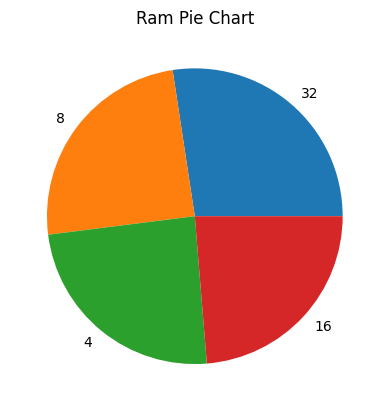

In [54]:
data["RAM_Size"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Ram Pie Chart")
plt.ylabel("")
plt.show()


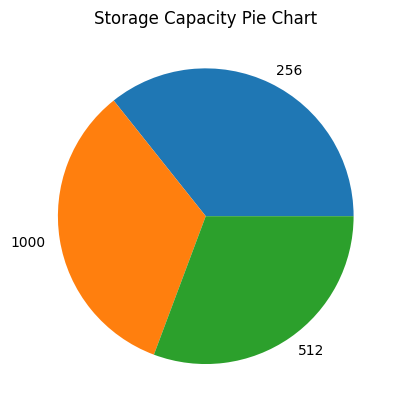

In [55]:
data["Storage_Capacity"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Storage Capacity Pie Chart")
plt.ylabel("")
plt.show()

In [56]:
data["Screen_Size"].value_counts()

Screen_Size
11.185147    1
11.311372    1
11.853023    1
12.280360    1
14.990877    1
            ..
12.587095    1
12.679356    1
12.666315    1
11.215581    1
16.561498    1
Name: count, Length: 1000, dtype: int64

In [57]:
# features and labels selection
X, y = data.drop("Price", axis=1), data["Price"]
X.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,Asus,3.830296,16,512,11.185147,2.641094
1,Acer,2.912833,4,1000,11.311372,3.260012
2,Lenovo,3.241627,4,256,11.853023,2.029061
3,Acer,3.806248,16,512,12.280360,4.573865
4,Acer,3.268097,32,1000,14.990877,4.193472


In [58]:
y

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64

In [ ]:
# preprocessing
categorical_features = ['Brand']
numeric_features = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']
